# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alpian Khairi
- **Email:** alpian.khairi@lintasarta.co.id
- **ID Dicoding:** alpian_khairi_C1BO

## Menentukan Pertanyaan Bisnis

<!-- 1. How do weather conditions affect bike rentals? -->

1. How do weather conditions impact bike rentals across different seasons?

2. What are the peak hours for bike rentals and how do they differ between weekdays and weekends?

3. How do usage patterns differ between casual and registered users throughout the day?
4. How do bike rentals fluctuate throughout the year and between different years?
5. How does ridership composition (casual vs. registered users) vary by season?
<!-- 7. Which factors have the strongest relationship with bike rental demand? -->



 

## Import Semua Packages/Library yang Digunakan


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [34]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [35]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Background**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


**Dataset characteristics**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In the overview above, it can be seen that several columns need to have their data types fixed. This stage will be carried out in data preprocessing.

In [37]:
print("Day Dataset Shape:", day_data.shape)
print("Hour Dataset Shape:", hour_data.shape)

Day Dataset Shape: (731, 16)
Hour Dataset Shape: (17379, 17)


**Datasets** have same shape with 731 rows and 16 columns.

Belows are samples from both datasets

In [38]:
display(day_data.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
display(hour_data.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Checking for missing values**

In [40]:
print("\nMissing values in Day Dataset:")
print(day_data.isnull().sum())


Missing values in Day Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [41]:
print(day_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [42]:
print("\nMissing values in Hour Dataset:")
print(hour_data.isnull().sum())


Missing values in Hour Dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [43]:
print(hour_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Nice!!** Both datasets have no missing values

**Checking for duplicates data**

In [44]:
day_data.duplicated().sum()

np.int64(0)

In [45]:
hour_data.duplicated().sum()

np.int64(0)

**Both datasets have no duplicates data**

### Cleaning Data


Convert date strings to datetime

In [46]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

Create datetime column for hour data

In [47]:
hour_data['datetime'] = pd.to_datetime(hour_data['dteday']) + pd.to_timedelta(hour_data['hr'], unit='h')

Map categorical variables to their meaningful representations

In [48]:
season_map = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
year_map = {0: '2011', 1: '2012'}

In [49]:
for df in [day_data, hour_data]:
    df['season_label'] = df['season'].map(season_map)
    df['weathersit_label'] = df['weathersit'].map(weather_map)
    df['yr_label'] = df['yr'].map(year_map)

## Exploratory Data Analysis (EDA)

**Descriptive statistics**

In [57]:
print("\nDay Dataset Statistics:")
print(day_data.describe())


Day Dataset Statistics:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000

**Average Rentals by Weather Condition**

In [50]:
weather_analysis = day_data.groupby('weathersit_label')['cnt'].agg(['mean', 'std', 'count']).reset_index()
print("\nAverage Rentals by Weather Condition:")
print(weather_analysis)


Average Rentals by Weather Condition:
  weathersit_label         mean          std  count
0            Clear  4876.786177  1879.483989    463
1  Light Rain/Snow  1803.285714  1240.284449     21
2      Mist/Cloudy  4035.862348  1809.109918    247


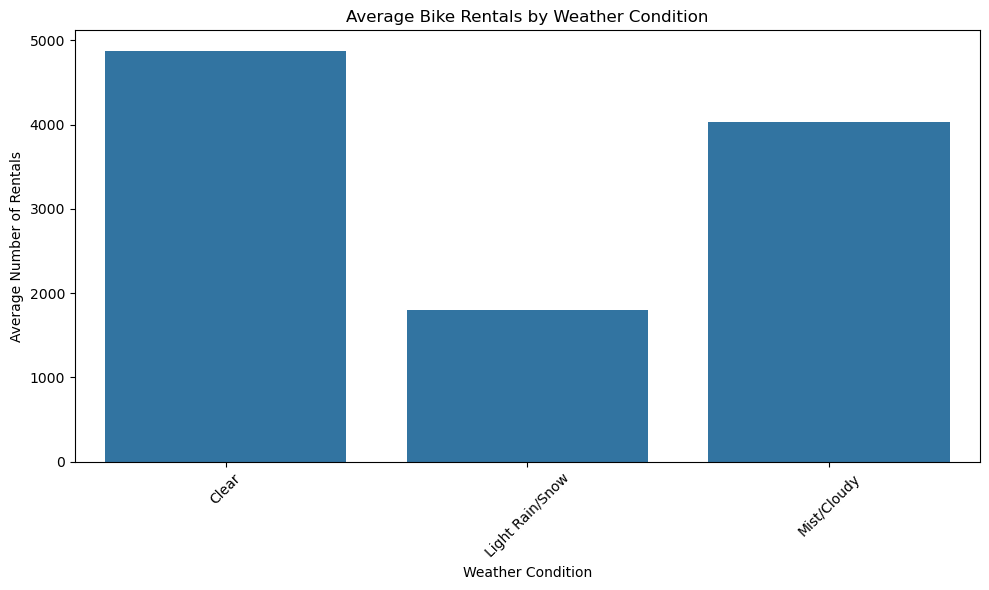

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_label', y='mean', data=weather_analysis)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights :

1. **Clear** weather conditions result in the highest average rentals with approximately 4,877 rentals per day.

2. **Light Rain/Snow** conditions have a significant negative impact on bike rentals, averaging only 1,803 rentals - approximately 63% lower than clear days.

3. **Mist/Cloudy** conditions show reasonably good performance with an average of 4,036 rentals, only about 17% lower than clear days.

4. The standard deviations for clear days (1,879) and misty/cloudy days (1,809) are relatively similar, indicating comparable variability in rental numbers under both conditions.

5. It's worth noting that the data distribution is uneven: there are 463 clear days, 247 misty/cloudy days, and only 21 days with light rain/snow in the dataset. The smaller sample size for light rain/snow conditions could affect the accuracy of the calculated average.

Business implications to consider:
- Special marketing or promotional strategies could be developed for light rain days to boost rentals
- Staffing and maintenance planning could be adjusted based on weather forecasts
- Revenue projections can be significantly influenced by seasonal weather patterns

## Visualization & Explanatory Analysis

### 1. How do weather conditions impact bike rentals across different seasons?

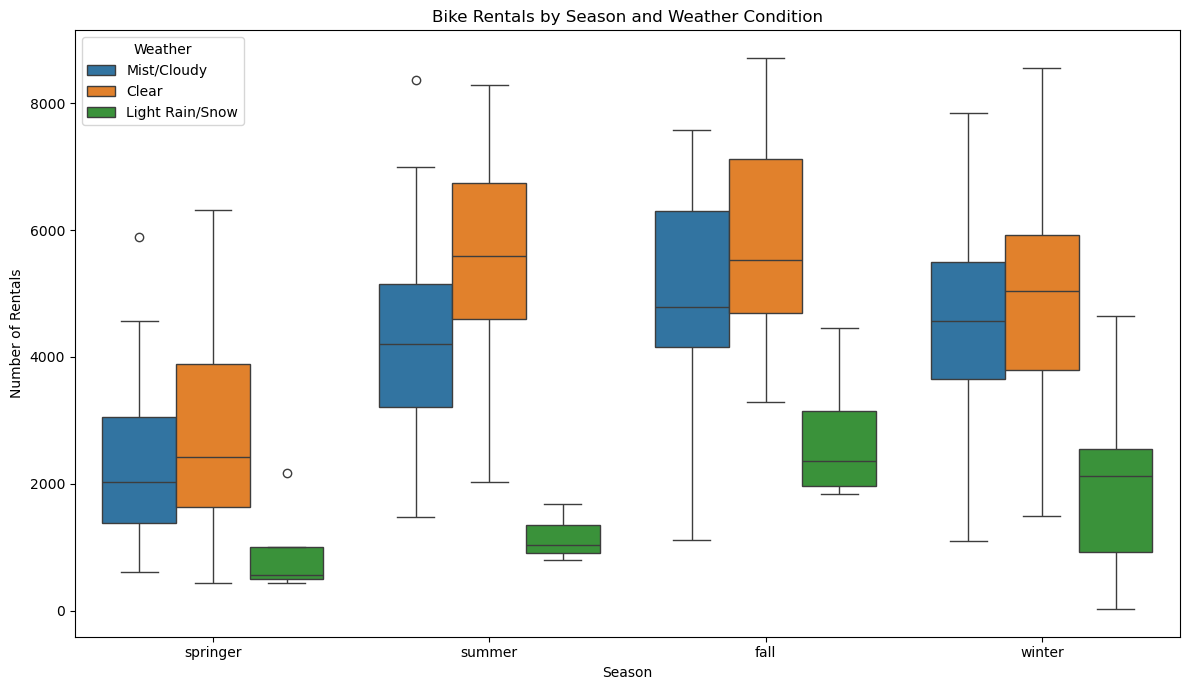

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season_label', y='cnt', hue='weathersit_label', data=day_data)
plt.title('Bike Rentals by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=0)
plt.legend(title='Weather', loc='upper left')
plt.tight_layout()
plt.show()

I can identify several key insights:

1. **Seasonal Variation**:
   - Fall has the highest overall bike rentals across weather conditions
   - Summer shows strong rental performance, particularly on clear days
   - Winter and spring generally have lower rental numbers, with spring showing the lowest median values

2. **Weather Impact Across Seasons**:
   - Clear weather consistently outperforms other conditions in all seasons
   - The negative impact of Light Rain/Snow is evident across all seasons, but varies in magnitude
   - The gap between Clear and Mist/Cloudy conditions is most pronounced in summer

3. **Specific Season-Weather Interactions**:
   - Fall with Clear weather shows the highest median rentals of any combination
   - Light Rain/Snow in spring shows the lowest rental performance overall
   - Fall maintains relatively high rentals even during Mist/Cloudy conditions

4. **Variability Patterns**:
   - Summer shows high variability (wide box and whiskers) in Clear conditions, suggesting inconsistent demand
   - Fall rentals during Clear weather have a high upper quartile but also significant variability
   - Light Rain/Snow in fall shows higher and more consistent rentals than in other seasons

5. **Outliers**:
   - There are notable outliers in spring for both Clear and Mist/Cloudy conditions
   - An extremely high outlier appears in summer under Clear conditions

6. **Business Implications**:
   - Seasonal pricing strategies should account for these variations
   - Marketing efforts could be focused on increasing spring rentals, which show the most opportunity for growth
   - Operational planning should anticipate higher demand variability in summer
   - Special weather-based incentives might be most effective in winter and spring

The visualization demonstrates that both season and weather have significant but interactive effects on rental patterns, with important implications for business planning and revenue optimization.

### 2. What are the peak hours for bike rentals and how do they differ between weekdays and weekends?


In [53]:
hour_data['is_weekend'] = hour_data['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

In [54]:
hourly_pattern = hour_data.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()

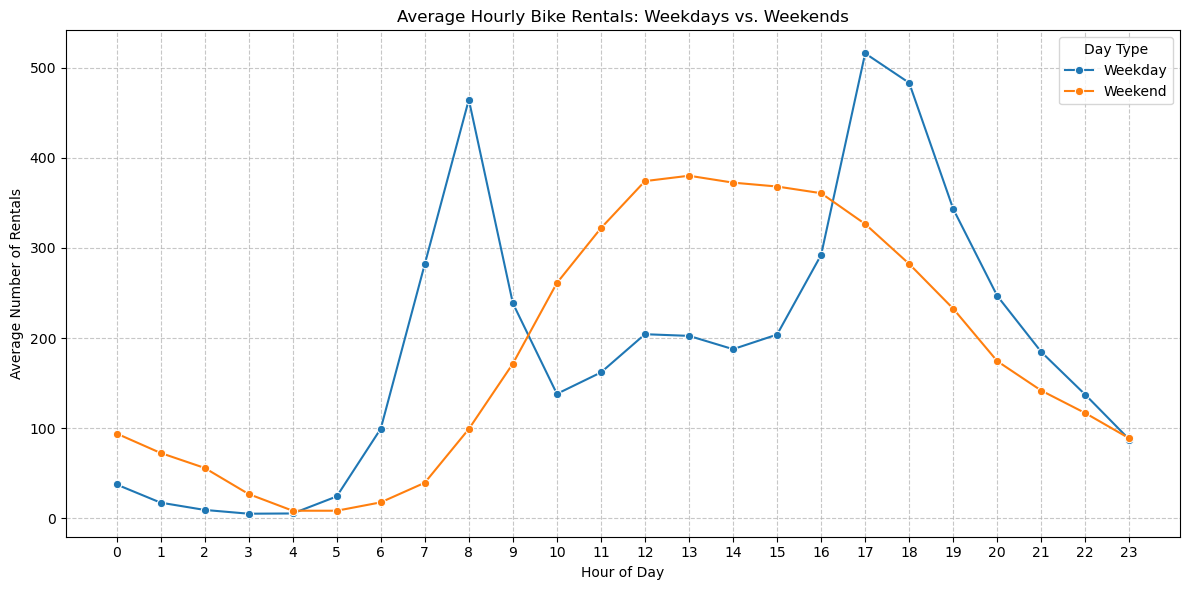

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='is_weekend', data=hourly_pattern, marker='o')
plt.title('Average Hourly Bike Rentals: Weekdays vs. Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

Analyzing the line chart of average hourly bike rentals comparing weekdays versus weekends, I can identify these key insights:

1. **Distinct Usage Patterns**:
   - Weekdays show two pronounced peak periods at 8 AM and 5-6 PM, clearly aligned with typical commuting hours
   - Weekends display a single broader peak that spans from approximately 11 AM to 5 PM

2. **Peak Rental Volumes**:
   - The highest demand on weekdays occurs at 5 PM (approximately 510 rentals), followed by 8 AM (approximately 470 rentals)
   - Weekend usage peaks around 12-1 PM (approximately 380 rentals)
   - The maximum weekday peak is about 34% higher than the weekend peak

3. **Morning Behavior**:
   - Early morning (midnight to 6 AM) shows minimal activity on both weekdays and weekends
   - Weekend mornings have consistently higher rentals than weekdays between 0-5 AM, suggesting late-night leisure activity
   - Weekday rentals surge dramatically starting around 6 AM, while weekend rentals increase more gradually

4. **Midday Patterns**:
   - Weekdays show a significant drop in rentals between the morning and evening peaks (9 AM to 4 PM)
   - Weekends maintain higher rental numbers throughout the midday period (11 AM to 5 PM)
   - Between 10 AM and 3 PM, weekend rentals substantially exceed weekday rentals

5. **Evening Trends**:
   - After the 5-6 PM peak, weekday rentals decline steadily
   - Weekend rentals also decline in the evening but at a more gradual rate
   - The patterns converge around 10 PM and remain similar through the night

6. **Business Implications**:
   - Bike availability should be optimized differently for weekdays versus weekends
   - Maintenance should be scheduled during low-demand periods (early morning hours)
   - Different marketing strategies could target commuters during weekdays and recreational users on weekends
   - The midday weekday period shows potential for growth through targeted promotions

This visualization clearly demonstrates that weekday usage is predominantly driven by commuting patterns, while weekend usage reflects leisure activity with a more distributed pattern throughout the day.

### 3. How do usage patterns differ between casual and registered users throughout the day?

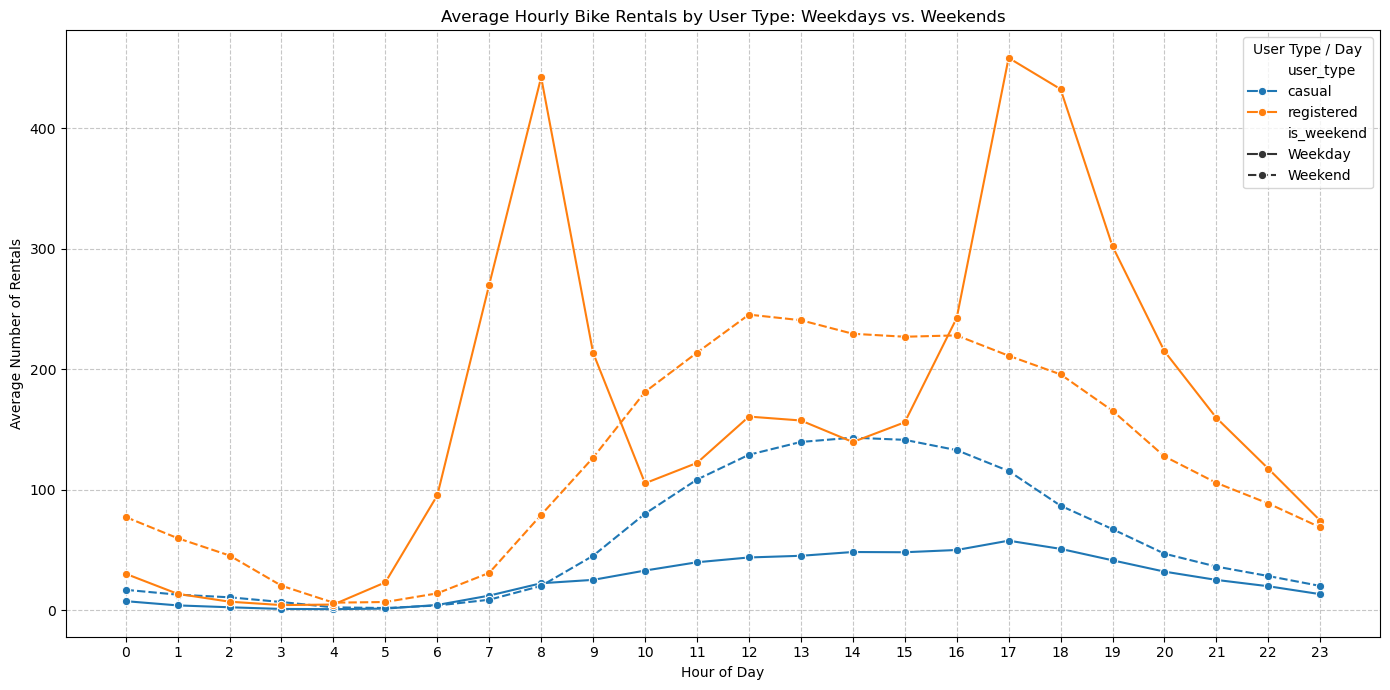

In [25]:
hourly_by_user = hour_data.groupby(['hr', 'is_weekend'])[['casual', 'registered']].mean().reset_index()
hourly_by_user_melted = pd.melt(hourly_by_user,
                                id_vars=['hr', 'is_weekend'],
                                value_vars=['casual', 'registered'],
                                var_name='user_type',
                                value_name='avg_count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='avg_count', hue='user_type', style='is_weekend', data=hourly_by_user_melted, marker='o')
plt.title('Average Hourly Bike Rentals by User Type: Weekdays vs. Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='User Type / Day')
plt.tight_layout()
plt.show()

Based on the visualization of average hourly bike rentals by user type comparing weekdays and weekends, I can identify these significant insights:

1. **Registered vs. Casual User Behavior**:
   - Registered users dominate overall rental volume, particularly on weekdays
   - Casual users show much more consistent patterns between weekdays and weekends

2. **Registered User Patterns**:
   - On weekdays, registered users show two distinct commuting peaks:
     * Morning peak at 8 AM (~440 rentals)
     * Evening peak at 5 PM (~460 rentals)
   - On weekends, registered users follow a single-peak pattern with maximum usage around midday (12-2 PM, ~240 rentals)
   - The weekday peaks for registered users are approximately 90% higher than their weekend peak

3. **Casual User Patterns**:
   - Casual users show a single-peak pattern on both weekdays and weekends
   - Weekend usage by casual users significantly exceeds weekday usage during daylight hours
   - Peak casual rentals occur at 1-2 PM on weekends (~140 rentals) and 5-6 PM on weekdays (+-60 rentals)
   - Casual users maintain higher rental levels throughout weekend daytime hours

4. **Time-of-Day Variations**:
   - Early morning (midnight to 6 AM) shows minimal activity across all user types and days
   - Midday (10 AM to 3 PM) shows the largest difference between weekday and weekend patterns
   - Evening patterns converge more closely after 8 PM for all user segments

5. **User Type Comparison**:
   - Registered users rent approximately 3-6 times more bikes than casual users during weekday peak hours
   - The gap narrows on weekends, but registered users still maintain significantly higher usage
   - Casual users show a more leisure-oriented pattern regardless of the day type

6. **Business Implications**:
   - Marketing strategies should target different user segments at different times:
     * Commuter programs for registered users on weekdays
     * Recreational promotions for casual users, especially on weekends
   - Potential opportunity to convert weekend casual users to registered status
   - Pricing strategies could be optimized based on user type and time of day
   - Bike availability planning should account for the significant differences in user behavior

This visualization effectively demonstrates that user type is a critical factor in understanding rental patterns, with registered users showing more utilitarian usage patterns while casual users display more recreational patterns.

### 4. How do bike rentals fluctuate throughout the year and between different years?

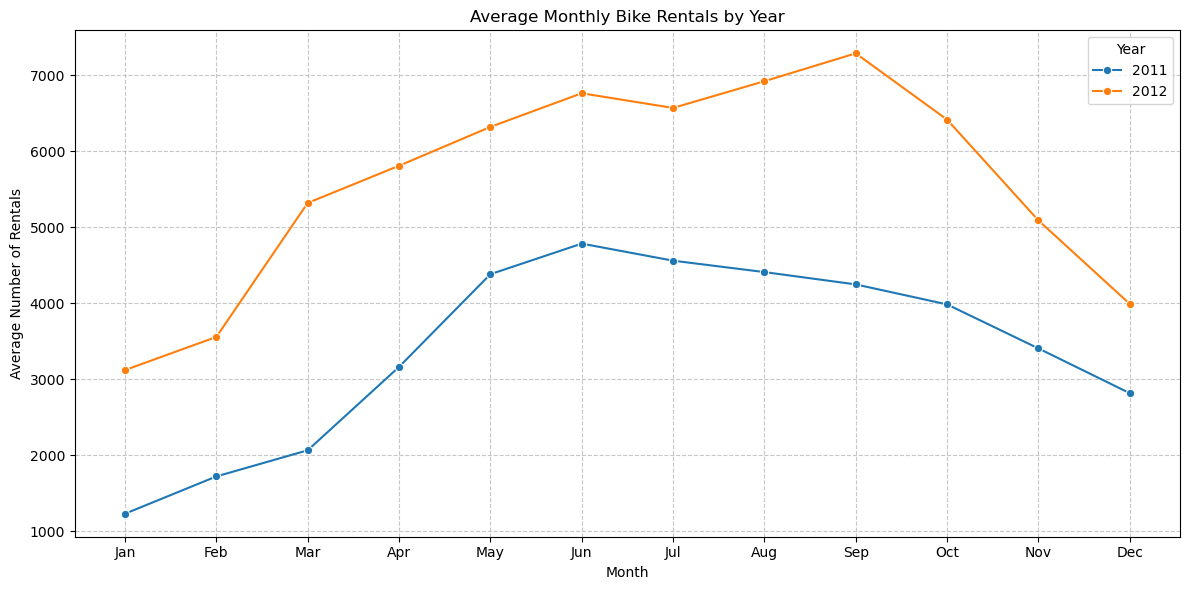

In [26]:
monthly_trends = day_data.groupby(['mnth', 'yr_label'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr_label', data=monthly_trends, marker='o')
plt.title('Average Monthly Bike Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Based on the visualization of average monthly bike rentals by year, I can identify several important insights:

1. **Year-over-Year Growth**:
   - There is a substantial increase in average rentals from 2011 to 2012 across all months
   - The growth rate appears most significant in the earlier months (January-March)
   - 2012 consistently outperforms 2011, indicating successful business expansion

2. **Seasonal Patterns**:
   - Both years show similar seasonal trends with peaks in the warmer months
   - 2011 peaks in June (~4,800 rentals), while 2012 peaks in September (~7,250 rentals)
   - The lowest rental periods occur in winter months (December-February)
   - The seasonal amplitude (difference between peak and trough) is greater in 2012 than in 2011

3. **Monthly Progression**:
   - Both years show a rapid increase in rentals from January through May
   - 2011 shows a fairly steady plateau from May-August before declining
   - 2012 shows more variability in the summer months with a slight dip in July before reaching its September peak

4. **Specific Month Analysis**:
   - January shows the lowest rentals in both years (~1,200 in 2011, ~3,100 in 2012)
   - September 2012 represents the highest point across the entire dataset (~7,250 rentals)
   - The difference between years is smallest in December and largest in September
   - Late summer/early fall (August-September) represents peak rental season in 2012

5. **Growth Metrics**:
   - The average increase across all months is approximately 2,000 additional rentals in 2012
   - The percentage increase varies by month, with early months showing nearly 200% growth
   - Even during the peak seasons, 2012 shows approximately 50% growth over 2011

6. **Business Implications**:
   - The consistent growth suggests successful business scaling or increased market adoption
   - Seasonal planning should account for the more pronounced peaks in 2012
   - The elevated winter performance in 2012 suggests potential for year-round service improvements
   - The September peak in 2012 might indicate a shift in usage patterns or successful promotional activities

This visualization clearly demonstrates both the seasonal nature of the bike rental business and significant year-over-year growth, with evidence of both business expansion and possibly evolving usage patterns.

### 5. How does ridership composition (casual vs. registered users) vary by season?

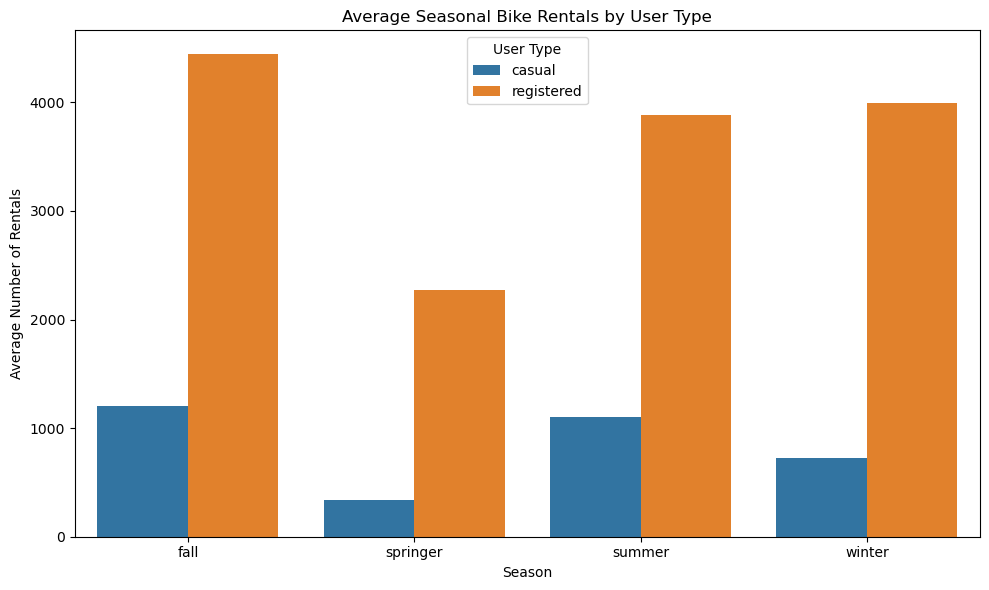

In [27]:
seasonal_user_trends = day_data.groupby('season_label')[['casual', 'registered', 'cnt']].mean().reset_index()
seasonal_user_melted = pd.melt(seasonal_user_trends,
                              id_vars=['season_label'],
                              value_vars=['casual', 'registered'],
                              var_name='user_type',
                              value_name='avg_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='avg_count', hue='user_type', data=seasonal_user_melted)
plt.title('Average Seasonal Bike Rentals by User Type')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=0)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

Analyzing the visualization of average seasonal bike rentals by user type, I can identify these key insights:

1. **Registered vs. Casual User Disparities**:
   - Registered users significantly outnumber casual users across all seasons
   - The ratio of registered to casual users is highest in spring (approximately 6:1)
   - Even in the most popular seasons for casual users, registered users maintain a 3-4× advantage

2. **Seasonal Patterns by User Type**:
   - **Registered Users**:
     * Fall shows the highest average rentals (~4,400)
     * Spring has the lowest rentals (~2,300)
     * Winter and summer show similar performance (~4,000 rentals)
   - **Casual Users**:
     * Fall and summer show the highest usage (~1,200 and ~1,100 respectively)
     * Spring has the lowest usage (~300)
     * Winter shows moderate usage (~700)

3. **Seasonal Sensitivity**:
   - Casual users display greater seasonal sensitivity than registered users
   - Spring represents a significant low point for casual users
   - The difference between highest and lowest seasons is proportionally greater for casual users
   - Registered users maintain relatively high usage even during less favorable seasons

4. **Fall Performance**:
   - Fall emerges as the top-performing season for both user types
   - This suggests favorable biking conditions (moderate temperatures, less precipitation) appeal to all users
   - The combined fall performance significantly exceeds other seasons

5. **Spring Anomaly**:
   - Spring shows surprisingly low performance for both user types
   - This contrasts with the monthly data that showed increasing rentals in spring months
   - This suggests potential inconsistencies in seasonal categorization or specific weather factors

6. **Business Implications**:
   - Targeted seasonal promotions could help boost casual ridership during spring
   - Conversion strategies from casual to registered should focus on summer and fall when casual usage is highest
   - Maintenance schedules should consider the higher demand in fall for all bikes
   - Winter performance by registered users suggests strong commuter loyalty despite seasonal challenges
   - Spring represents the greatest opportunity for growth initiatives

This visualization effectively highlights how different user segments respond to seasonal factors, with registered users showing more consistent year-round usage patterns while casual users display higher seasonal sensitivity.

## Analisis Lanjutan (Opsional)

**Correlation analysis**


Correlation Analysis:
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64


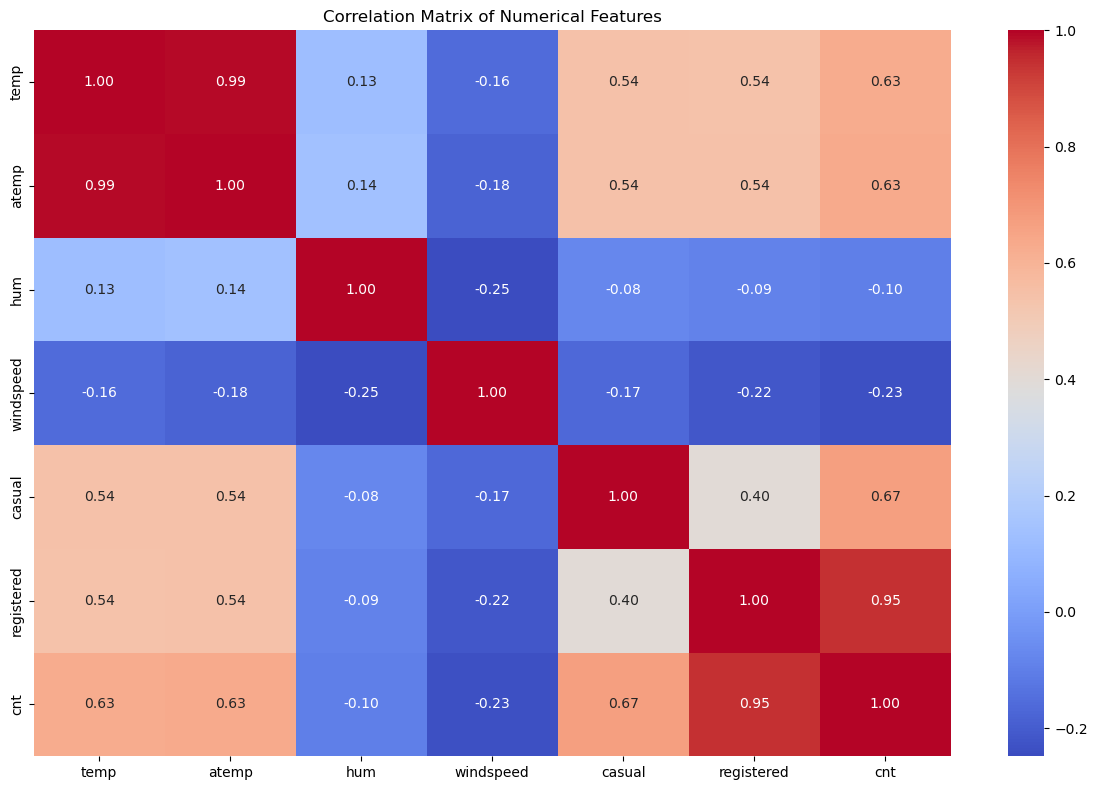

In [28]:
print("\nCorrelation Analysis:")
correlation = day_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
print(correlation['cnt'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

The correlation matrix provides valuable insights into the relationships between weather variables and bike rental patterns:

1. **Total Rentals (cnt) Correlations**:
   - **Registered Users**: Extremely high correlation (0.95) with total rentals, indicating registered users drive the majority of business
   - **Casual Users**: Strong correlation (0.67) with total rentals, but significantly less influential than registered users
   - **Temperature Variables**: Both temperature (0.63) and "feels like" temperature (0.63) show strong positive correlations with rentals
   - **Windspeed**: Negative correlation (-0.23) with rentals, confirming riders are deterred by windy conditions
   - **Humidity**: Slight negative correlation (-0.10) with rentals, suggesting high humidity has a minor negative effect

2. **Weather Variable Relationships**:
   - **Temperature Measures**: Temperature and "feels like" temperature are nearly perfectly correlated (0.99)
   - **Windspeed**: Negatively correlated with all other variables
      * Moderate negative correlation with humidity (-0.25)
      * Slight negative correlations with temperature variables (-0.16 to -0.18)
   - **Humidity**: Shows weak correlations with temperature variables (0.13-0.14)

3. **User Type Differences**:
   - **Casual Users**:
      * More strongly affected by temperature (0.54) than registered users
      * Stronger negative correlation with windspeed (-0.17)
   - **Registered Users**:
      * Stronger negative correlation with windspeed (-0.22)
      * Similar correlation with temperature (0.54) as casual users
   - **Correlation Between User Types**: Moderate positive correlation (0.40) between casual and registered users

4. **Business Implications**:
   - Temperature is a major driver of bike rentals for all users
   - Windspeed has a more significant deterrent effect than humidity
   - Registered users show more consistent behavior patterns
   - Marketing strategies should consider the moderate correlation between user types
   - Weather forecasting could be integrated into business planning
   - Initiatives to minimize the effects of wind (e.g., strategic station placement) could improve rentals

5. **Potential Model Inputs**:
   - Due to the high correlation between temperature measures, only one should be included in predictive models
   - The strong correlation between registered users and total count suggests segmented models may be beneficial
   - All weather variables show sufficient correlation to be considered relevant for predicting rental behavior

This correlation analysis confirms the importance of weather conditions on bike rental behavior while highlighting differences between user segments.

## Conclusion

**Bike Rental Data Analysis Summary**

**The Impact of Weather on Bike Rentals**

- **Clear Weather Conditions** yield the highest average rentals (4,877 bikes/day)
- **Light Rain/Snow** significantly decreases rentals (1,803 bikes/day, 63% lower than clear days)
- **Mist/Cloudy** shows reasonably good performance (4,036 bikes/day, only 17% lower than clear days)
- Data distribution is uneven: 463 clear days, 247 misty/cloudy days, and only 21 days with light rain/snow

**Seasonal and Weather Variations**

- **Fall Season** shows the highest rentals across all weather conditions
- **Summer** shows strong performance, particularly on clear days
- **Winter and Spring** generally have lower rental numbers
- Clear weather consistently outperforms other weather conditions in all seasons
- **Fall with Clear weather** combination shows the highest average rentals
- **Light Rain/Snow in spring** shows the lowest rental performance

**Weekday vs Weekend Usage Patterns**

- **Weekdays**: Two distinct peak periods at 8 AM and 5-6 PM (510 and 470 rentals)
- **Weekends**: A single broader peak spanning from around 11 AM to 5 PM (380 rentals)
- The maximum weekday peak is about 34% higher than the weekend peak
- Between 10 AM and 3 PM, weekend rentals substantially exceed weekday rentals
- Early morning (midnight to 6 AM) shows minimal activity on both day types

**Behavior by User Type**

- **Registered Users**:
  - Dominate overall rental volume, particularly on weekdays
  - Show two distinct commuting peaks on weekdays (morning 440 rentals, evening 460 rentals)
  - On weekends, follow a single-peak pattern (midday 240 rentals)
- **Casual Users**:
  - Show a single-peak pattern on both weekdays and weekends
  - Weekend usage significantly exceeds weekday usage
  - Peak rentals occur at 1-2 PM on weekends (140 rentals)
  - Display a leisure-oriented pattern regardless of the day type

**Annual Growth**

- Substantial increase in average rentals from 2011 to 2012 across all months
- Growth rate appears most significant in the earlier months (January-March)
- 2011 peaks in June (~4,800 rentals), while 2012 peaks in September (~7,250 rentals)
- The lowest rental periods occur in winter months (December-February)
- The average increase is approximately 2,000 additional rentals in 2012

**Seasonal Patterns by User Type**

- **Registered Users**:
  - Fall shows the highest average rentals (~4,400)
  - Spring has the lowest rentals (~2,300)
  - Winter and summer show similar performance (~4,000 rentals)
- **Casual Users**:
  - Fall and summer show the highest usage (~1,200 and ~1,100 respectively)
  - Spring has the lowest usage (~300)
  - Display greater seasonal sensitivity than registered users

**Correlations with Weather Variables**

- **Temperature**: Strong positive correlation (0.63) with total rentals
- **Windspeed**: Negative correlation (-0.23) with rentals, confirming riders are deterred by windy conditions
- **Humidity**: Slight negative correlation (-0.10) with rentals
- **Casual Users** are more strongly affected by temperature (0.54) than registered users
- **Registered Users** show stronger negative correlation with windspeed (-0.22)

**Business Implications**

1. **Differential Marketing Strategies**:
   - Commuter programs for registered users on weekdays
   - Recreational promotions for casual users, especially on weekends
   - Special strategies to boost rentals on light rain days

2. **Operational Planning**:
   - Bike availability should be optimized differently for weekdays versus weekends
   - Maintenance should be scheduled during low-demand periods (early morning hours)
   - Staffing can be adjusted based on weather forecasts

3. **Growth Opportunities**:
   - Spring represents the greatest opportunity for growth initiatives
   - The midday weekday period shows potential for growth through targeted promotions
   - Conversion strategies from casual to registered should focus on summer and fall

4. **Revenue Projections**:
   - Revenue projections can be significantly influenced by seasonal weather patterns
   - Registered users drive the majority of business (0.95 correlation with total rentals)
   - Weather forecasting could be integrated into business planning